In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import json
import matplotlib.pyplot as plt

In [2]:
dire_repo = '/home/mongardi/tree-based-models/prior_tree_models_repo'
dire_results =  os.path.join(dire_repo,'results/BRCA/plots')

In [3]:
results_dire = os.path.join(dire_repo, "results/BRCA/results_rf")

In [4]:
files = ['no_gis_rf_False.csv','no_gis_rf_True.csv', 
        'on_feature_selection_rf_False.csv', 'on_feature_selection_rf_True.csv',
        'on_impurity_improvement_rf_False.csv', 'on_impurity_improvement_rf_True.csv',
        'all_rf_False.csv', 'all_rf_True.csv']    

In [5]:
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', 'None']
#configurations = ['baseline + oob', 'impurity improvement (II) + oob', 'feature sampling (FS) + oob', 'ALL + oob']
configurations = ['baseline', 'baseline + OOB' ,'feature sampling (FS)',
 'feature sampling (FS) + OOB',
 'impurity improvement (II)',
 'impurity improvement (II) + OOB',
  'ALL', 'ALL + OOB']

In [6]:
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_stds = []
f1_stds = []
precision_stds = []
recall_stds = []
for i, file in enumerate(files):
    df = pd.read_csv(os.path.join(results_dire, file))
    accuracy_scores.append(df["accuracy mean"].values)
    f1_scores.append(df["f1 mean"].values)
    precision_scores.append(df["precision mean"].values)
    recall_scores.append(df["recall mean"].values)
    accuracy_stds.append(df["accuracy std"].values)
    f1_stds.append(df["f1 std"].values)
    precision_stds.append(df["precision std"].values)
    recall_stds.append(df["recall std"].values)

In [7]:
max_features_values

['sqrt', '1000', '2000', '5000', '10000', 'None']

In [8]:
for i in range(len(configurations)):
    print(i)
    for j in range(len(max_features_values)):
        print(accuracy_scores[i][j], accuracy_stds[i][j],  f1_scores[i][j], f1_stds[i][j], precision_scores[i][j], precision_stds[i][j], recall_scores[i][j], recall_stds[i][j])

0
0.8901 0.0073 0.8609 0.0107 0.9072 0.0048 0.8359 0.013
0.9129 0.0149 0.9015 0.0145 0.9257 0.0134 0.8838 0.0155
0.9218 0.0079 0.9149 0.0102 0.9343 0.0064 0.8999 0.0128
0.9292 0.0094 0.9241 0.0124 0.9399 0.0072 0.9114 0.0158
0.9252 0.0075 0.918 0.0095 0.9334 0.0087 0.9059 0.0116
0.9188 0.0077 0.9092 0.0079 0.9236 0.0084 0.8982 0.0091
1
0.8916 0.01 0.8655 0.0138 0.9083 0.0084 0.8417 0.0161
0.9109 0.0161 0.899 0.0172 0.9245 0.0137 0.8807 0.0197
0.9262 0.0064 0.9195 0.0082 0.9373 0.005 0.9058 0.0106
0.9297 0.0106 0.9248 0.0135 0.9399 0.0079 0.9129 0.0174
0.9257 0.0059 0.9181 0.0071 0.9347 0.0087 0.905 0.0085
0.9149 0.0082 0.9064 0.0082 0.921 0.0094 0.8952 0.0084
2
0.8812 0.0117 0.8563 0.0142 0.8923 0.0144 0.8351 0.0159
0.9163 0.006 0.8968 0.0119 0.9182 0.0102 0.881 0.0141
0.9089 0.0067 0.8886 0.0141 0.9006 0.0135 0.8784 0.0153
0.9292 0.005 0.9248 0.0059 0.9381 0.0081 0.9138 0.0054
0.9218 0.0073 0.9184 0.0096 0.9322 0.005 0.9076 0.0136
0.9203 0.0075 0.9137 0.0071 0.9287 0.0057 0.9026 0.008

In [9]:
#colors = ['royalblue',  '#FF800E',  '#5F9ED1', '#898989' ]
colors = ['navy', 'royalblue', '#C85200', '#FF800E', 
            '#006BA4', '#5F9ED1', '#595959', '#898989']

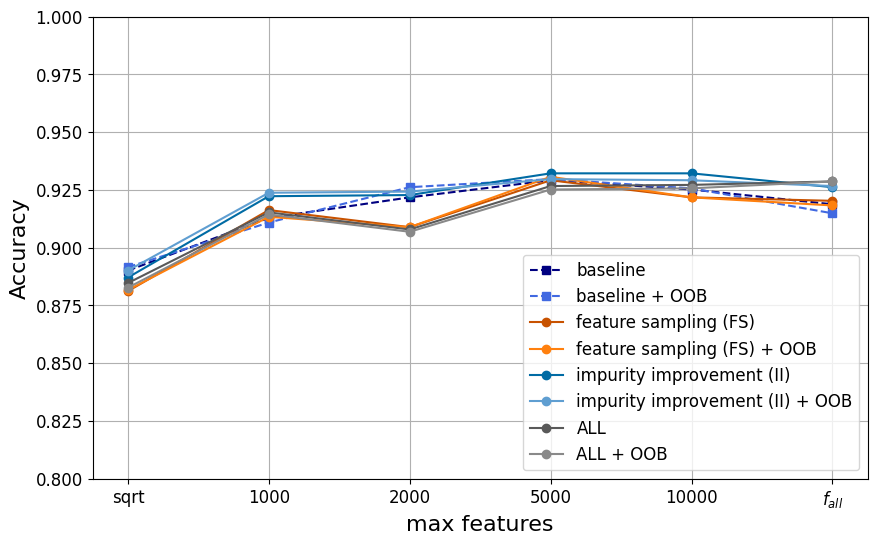

In [10]:
# Plot Accuracy
max_features_values = ['sqrt', '1000', '2000', '5000', '10000', '$f_{all}$']
plt.figure(figsize=(10, 6))
for i,accuracies in enumerate(accuracy_scores):
    # if "OOB" in configurations[i]:
    #     plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    
    if "baseline" in  configurations[i]:
        plt.plot(max_features_values, accuracies, marker='s', label=configurations[i], color=colors[i], linestyle='--')
    else:
        plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    #plt.fill_between(max_features_values, np.array(accuracies) - np.array(accuracy_stds[i]), np.array(accuracies) + np.array(accuracy_stds[i]), alpha=0.2)
plt.xlabel("max features", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
#plt.title("Accuracy across n_estimators for each configuration")
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0.80, 1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(dire_results,"accuracy_rf.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)

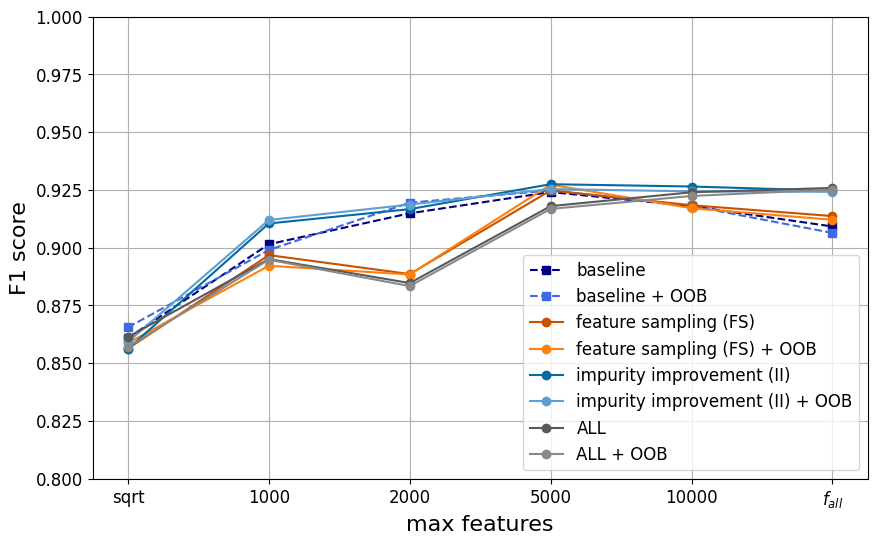

In [11]:

plt.figure(figsize=(10, 6))
for i,accuracies in enumerate(f1_scores):
    # if "OOB" in configurations[i]:
    #     plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    
    if "baseline" in  configurations[i]:
        plt.plot(max_features_values, accuracies, marker='s', label=configurations[i], color=colors[i], linestyle='--')
    else:
        plt.plot(max_features_values, accuracies, marker='o', label=configurations[i], color=colors[i])
    #plt.fill_between(max_features_values, np.array(accuracies) - np.array(accuracy_stds[i]), np.array(accuracies) + np.array(accuracy_stds[i]), alpha=0.2)
plt.xlabel("max features", fontsize=16)
plt.ylabel("F1 score", fontsize=16)
#plt.title("Accuracy across n_estimators for each configuration")
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(0.80, 1)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(os.path.join(dire_results,"f1_rf.pdf"), format='pdf', bbox_inches='tight',pad_inches = 0, dpi=1200)